In [6]:
from nilearn.maskers import NiftiLabelsMasker
from scipy.ndimage import center_of_mass
import nibabel as nib
import numpy as np
import pandas as pd
import os

In [ ]:
# Define data directory and mapping file
# BEIJING
# data_dir = '/home/zaz22/research-data-store/fmri/fmri_beijing'
# mapping_file = '/home/zaz22/research-data-store/rois/rois_3000_beijing/rois/brain_atoms.mnc.gz'  
# subject_ids = [
#     '9640133', '9783279', '9887336', '9890726', '4095748', '4136226', '4221029',
#     '4225073', '4241194', '4256491', '4265987', '4334113', '4383707', '4475709',
#     '4921428', '5150328', '5193577', '5575344', '5600820', '5669389', '5993008',
#     '6187322', '6383713', '6477085', '6500128', '7011503', '7093319', '7135128',
#     '7253183', '7390867', '7407032', '7689953', '7994085', '8191384', '8278680',
#     '8328877', '8838009', '9002207', '9093997', '9210521', '9221927', '9578631',
#     '3494778', '3554582', '3561920', '3562883', '3587000', '3593327', '3610134',
#     '3624598', '3655623', '3672300', '3672854', '3691107', '3707771', '3712305',
#     '3732101', '3739175', '3803759', '3809753', '3827352', '3856956', '3870624',
#     '3889095', '3910672', '3930512', '3967265', '3976121', '3983607', '3993793',
#     '3994098', '4006710', '4028266', '4048810', '4053388', '4053836', '4055710',
#     '4073815', '4075719', '4091983', '2538839', '2559537', '2601519', '2659769',
#     '2697768', '2703336', '2714224', '2737106', '2780647', '2833684', '2884672',
#     '2897046', '2907951', '2910270', '2919220', '2940712', '2950754', '2984158',
#     '3004580', '3086074', '3157406', '3194757', '3205761', '3212536', '3224401'
# ]
# N_SUBJECTS = 105


# KKI
# data_dir = '/home/zaz22/research-data-store/fmri/fmri_kki'
# mapping_file = '/home/zaz22/research-data-store/rois/rois_3000_kki/rois/brain_rois.mnc.gz' 
# subject_ids =  ['8083695',
#   '1018959',
#   '5216908',
#   '8432725',
#   '2621228',
#   '1996183',
#   '3170319',
#   '4362730',
#   '3972472',
#   '4275075',
#   '2641332',
#   '1686265',
#   '2740232',
#   '1535233',
#   '8658218',
#   '9922944',
#   '3434578',
#   '2138826',
#   '1594156',
#   '3699991',
#   '1541812',
#   '2554127',
#   '1577042',
#   '2601925',
#   '3713230',
#   '7415617',
#   '2703289',
#   '7129258',
#   '2572285',
#   '3119327',
#   '1873761',
#   '3160561',
#   '3902469',
#   '6346605',
#   '2360428',
#   '2917777',
#   '2618929',
#   '1735881',
#   '2026113',
#   '1842819',
#   '2903997',
#   '1962503',
#   '2081148',
#   '1652369',
#   '1266183',
#   '2018106',
#   '4601682',
#   '2014113',
#   '3154996',
#   '3310328',
#   '3884955',
#   '1638334',
#   '2371032',
#   '4104523',
#   '1692275',
#   '3917422',
#   '3611827',
#   '3813783',
#   '8628223',
#   '1779922',
#   '3912996',
#   '1846346',
#   '6453038',
#   '2768273',
#   '1988015',
#   '2640795',
#   '2299519',
#   '8263351',
#   '7774305',
#   '3972956',
#   '2930625',
#   '2344857',
#   '3486975',
#   '1623716',
#   '1019436',
#   '3519022',
#   '1043241',
#   '3103809',
#   '2558999',
#   '2104012',
#   '4154182',
#   '2822304',
#   '8337695'] 
# N_SUBJECTS = 83

# neuroimage
# data_dir = '/home/zaz22/research-data-store/fmri/fmri_neuroimage'
# mapping_file = '/home/zaz22/research-data-store/rois/rois_3000_neuroimage/rois/brain_atoms.mnc.gz'  
# subject_ids=['2876903', '1538046', '6115230', '4134561', '3322144', '3941358', '1588809', '3082137', '8387093', '2961243',
#  '4239636', '1312097', '3304956', '3007585', '7339173', '7446626', '1208586', '1438162', '3566449', '4919979',
#  '2756846', '4020830', '3888614', '3048588', '5045355', '3190461', '8409791', '3808273', '2419464', '2671604',
#  '3858891', '3108222', '4285031', '1125505', '3980079', '3515506', '2352986', '2574674', '1017176', '1411495',
#  '8991934', '2074737', '3959823', '1585708', '2029723', '3449233', '9956994', '7504392'
# ]
# N_SUBJECTS = 48


# nyu
# data_dir = '/home/zaz22/research-data-store/fmri/fmri_nyu'
# mapping_file = '/home/zaz22/research-data-store/rois/rois_3000_nyu/rois/brain_atoms.mnc.gz' 
# subject_ids = [
#     '0010048', '4187857', '0010101', '0010122', '0010058', '0010050', '2230510', 
#     '5971050', '2773205', '0010070', '1057962', '0010010', '2570769', '0010009', 
#     '9907452', '9578663', '2107638', '0010108', '0010118', '0010077', '2260910', 
#     '0010024', '1099481', '8009688', '2991307', '0010042', '9326955', '1127915', 
#     '0010081', '0010090', '2996531', '0010011', '3845761', '0010062', '2297413', 
#     '0010099', '1435954', '0010006', '0010096', '0010021', '0010065', '1854959', 
#     '3163200', '2907383', '0010039', '3349423', '0010046', '2735617', '6206397', 
#     '2983819', '0010018', '0010115', '0010086', '3349205', '3011311', '0010102', 
#     '1511464', '0010075', '1918630', '0010091', '0010056', '3619797', '0010029', 
#     '0010111', '1934623', '0010005', '4164316', '0010019', '1737393', '0010007', 
#     '0010076', '0010037', '4562206', '0010051', '4084645', '1992284', '0010106', 
#     '0010003', '0010060', '0010013', '0010119', '0010001', '0010043', '2054438', 
#     '0010040', '0010061', '0010052', '0010002', '6568351', '0010085', '0010095', 
#     '2136051', '0010087', '2741068', '1497055', '4116166', '0010103', '0010064', 
#     '9750701', '0010020', '0010126', '1995121', '0010109', '3650634', '3662296'
# ]
# N_SUBJECTS = 105

# ohsu
# data_dir = '/home/zaz22/research-data-store/fmri/fmri_ohsu'
# mapping_file = '/home/zaz22/research-data-store/rois/rois_3000_ohsu/rois/brain_atoms.mnc.gz'  
# subject_ids = [
#     '2071989', '7333005', '1696588', '1647968', '1743472', '3684229', '4219416', 
#     '6953386', '2535204', '1536593', '1552181', '3869075', '4046678', '3899622', 
#     '1411223', '3048401', '1386056', '3286474', '2559559', '8218392', '3560456', 
#     '3848511', '8064456', '2578455', '4529116', '2920716', '2232376', '3212875', 
#     '2288903', '2561174', '2790141', '1340333', '3051944', '3244985', '2959809', 
#     '2292940', '1679142', '3358877', '1664335', '1421489', '2929195', '9499804', 
#     '4016887', '3652932', '3466651', '3677724', '2620872', '2947936', '3302025', 
#     '6592761', '3162671', '8720244', '3206978', '1108916', '4072305', '2427434', 
#     '3052540', '1481430', '1084283', '2054998', '1548937', '2845989', '2409220', 
#     '2455205', '1502229', '2571197', '1084884', '2155356', '2426523', '3812101', 
#     '2415970', '2124248', '1206380', '2054310', '1418396', '4103874', '5302451', 
#     '3470141', '2232413'
# ]
# N_SUBJECTS = 79

# washu
# data_dir = '/home/zaz22/research-data-store/fmri/fmri_washu'
# mapping_file = '/home/zaz22/research-data-store/rois/rois_3000_washu/rois/brain_atoms.mnc.gz'  
# subject_ids = [
#     '0015008', '0015054', '0015035', '0015058', '0015003', '0015042', 
#     '0015034', '0015053', '0015035', '0015043', '0015024', '0015061', 
#     '0015003', '0015033', '0015037', '0015040', '0015040', '0015012', 
#     '0015015', '0015002', '0015053', '0015031', '0015042', '0015058', 
#     '0015049', '0015060', '0015051', '0015047', '0015061', '0015005', 
#     '0015008', '0015039', '0015044', '0015003', '0015003', '0015020', 
#     '0015003', '0015031', '0015050', '0015022', '0015045', '0015030', 
#     '0015039', '0015040', '0015017', '0015060', '0015059', '0015049', 
#     '0015055', '0015005', '0015034', '0015029', '0015043', '0015043', 
#     '0015060', '0015049', '0015033', '0015037', '0015028', '0015030', 
#     '0015003', '0015061', '0015005', '0015006', '0015025', '0015045', 
#     '0015054', '0015002', '0015020', '0015047', '0015048', '0015002', 
#     '0015010', '0015005', '0015055', '0015002', '0015058', '0015056', 
#     '0015029', '0015047', '0015030', '0015031', '0015062', '0015042', 
#     '0015007', '0015034', '0015021', '0015028', '0015053', '0015029', 
#     '0015002', '0015007', '0015002', '0015059', '0015048', '0015014', 
#     '0015028', '0015037', '0015041', '0015013', '0015038', '0015046', 
#     '0015020', '0015062', '0015041'
# ]

# N_SUBJECTS = 105


# Define repetition time (TR)
repetition_time = 2.0

# List of subject IDs

print(len(subject_ids))


83


In [8]:
# Load the ROI mapping file
mapping_img = nib.load(mapping_file)
mapping_data = mapping_img.get_fdata()
affine = mapping_img.affine

# Get unique ROI labels, excluding 0
roi_labels = np.unique(mapping_data)
roi_labels = roi_labels[roi_labels != 0]
print(f'Number of ROIs: {len(roi_labels)}')


Number of ROIs: 2843


In [9]:
# Extract ROI coordinates (center of mass)
roi_coords = []

for label in roi_labels:
    # Create a binary mask for the current ROI
    roi_mask = mapping_data == label

    # Calculate the center of mass in voxel space
    com_voxel = center_of_mass(roi_mask)

    # Convert voxel coordinates to world coordinates
    com_world = nib.affines.apply_affine(affine, com_voxel)

    roi_coords.append(com_world)

print(f'ROI coordinates (world space): {roi_coords}')


ROI coordinates (world space): [array([-52.84615385,   3.84615385,  25.92307692]), array([-37.26315789,  -7.63157895,  53.57894737]), array([-28.36363636, -23.63636364,  62.36363636]), array([-32.5       ,  -2.83333333,  44.66666667]), array([-33.64285714,  -1.42857143,  57.78571429]), array([-29. , -16.4,  64.2]), array([-39.15,   4.55,  36.85]), array([-36.        ,  -2.94117647,  62.23529412]), array([-33.75  ,  -8.3125,  47.875 ]), array([-38.45454545,   2.40909091,  42.72727273]), array([-22.25806452, -21.80645161,  64.87096774]), array([-34.09090909, -14.63636364,  56.63636364]), array([-53.68421053,   9.42105263,  38.10526316]), array([-39.85714286, -17.07142857,  56.5       ]), array([-51.77777778,   2.88888889,  18.11111111]), array([-59.59090909,   6.90909091,  25.54545455]), array([-53.78571429,  -5.5       ,  30.78571429]), array([-54.81818182,   3.36363636,  44.77272727]), array([-17.21052632, -14.42105263,  68.42105263]), array([-36.        , -21.29411765,  67.        ]),

In [10]:
# Initialize a masker for extracting time series from ROIs
labels_masker = NiftiLabelsMasker(
    labels_img=mapping_img,
    standardize=True,
    detrend=True,
    t_r=repetition_time,
    verbose=1
)

# Initialize a list to store time series for all subjects
all_tseries = []

for sub_id in subject_ids:
    # Build the functional file path
    func_file = os.path.join(data_dir, f'fmri_X_{sub_id}_session_1_run1.nii.gz')
    print(f'Loading functional image for subject {sub_id} from {func_file}')
    
    # Load the functional image
    func_img = nib.load(func_file)
    
    # Extract time series using the labels masker
    tseries = labels_masker.fit_transform(func_img)
    
    all_tseries.append(tseries)
    print(f'Extracted time series for subject {sub_id}, shape: {tseries.shape}')


Loading functional image for subject 8083695 from /home/zaz22/research-data-store/fmri/fmri_kki/fmri_X_8083695_session_1_run1.nii.gz
[NiftiLabelsMasker.wrapped] loading data from Minc1Image('/home/zaz22/research-data-store/rois/rois_3000_kki/rois/brain_rois.mnc.gz')
Resampling labels
[NiftiLabelsMasker.transform_single_imgs] Loading data from Nifti1Image('/home/zaz22/research-data-store/fmri/fmri_kki/fmri_X_8083695_session_1_run1.nii.gz')
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
Extracted time series for subject 8083695, shape: (124, 2843)
Loading functional image for subject 1018959 from /home/zaz22/research-data-store/fmri/fmri_kki/fmri_X_1018959_session_1_run1.nii.gz
[NiftiLabelsMasker.wrapped] loading data from Minc1Image('/home/zaz22/research-data-store/rois/rois_3000_kki/rois/brain_rois.mnc.gz')
[NiftiLabelsMasker.transform_single_imgs] Loading data from Nifti1Image('/home/zaz22/resear

In [11]:
# Define file paths and parameters
behavioral_file = '/home/zaz22/repos/adhd-mri-using-ml/adhd200_preprocessed_phenotypics.tsv'  # Update with your actual file path
behavioral = pd.read_csv(behavioral_file, sep='\t')

# Define diagnosis groups
behavioral['DX'] = behavioral['DX'].astype(str).str.strip()

# Apply mapping
conditions_map = {
    '0': 'Non-ADHD',
    '1': 'ADHD',
    '2': 'ADHD',
    '3': 'ADHD'
}
behavioral['Diagnosis_Class'] = behavioral['DX'].map(conditions_map)
print(behavioral['Diagnosis_Class'].value_counts(dropna=False))


Diagnosis_Class
Non-ADHD    585
ADHD        362
NaN          26
Name: count, dtype: int64


In [12]:
# Map the diagnosis column to binary classes
behavioral['Diagnosis_Class'] = behavioral['DX'].map(conditions_map)
behavioral = behavioral.loc[behavioral['DX'] != 'pending']
print(behavioral['DX'].unique())  # Check all unique values in the DX column
print(behavioral['Diagnosis_Class'].value_counts())  # Check how the mapping works
print(behavioral[behavioral['DX'].isna()])  # Check rows where DX is NaN
print(behavioral['Diagnosis_Class'].unique())  # Check unique mapped values
print(behavioral['DX'].dtypes)  # Check if the column is numeric or string
print(behavioral['DX'].unique())  # Confirm all unique values


['0' '1' '3' '2']
Diagnosis_Class
Non-ADHD    585
ADHD        362
Name: count, dtype: int64
Empty DataFrame
Columns: [ScanDir ID, Site, Gender, Age, Handedness, DX, Secondary Dx, ADHD Measure, ADHD Index, Inattentive, Hyper/Impulsive, IQ Measure, Verbal IQ, Performance IQ, Full2 IQ, Full4 IQ, Med Status, QC_Athena, QC_NIAK, Diagnosis_Class]
Index: []
['Non-ADHD' 'ADHD']
object
['0' '1' '3' '2']


Condition mask shape: (947,)
947
Behavioral data shape after filtering: (947, 20)
Valid Subject IDs: ['8083695', '1018959', '5216908', '8432725', '2621228', '1996183', '3170319', '4362730', '3972472', '4275075', '2641332', '1686265', '2740232', '1535233', '8658218', '9922944', '3434578', '2138826', '1594156', '3699991', '1541812', '2554127', '1577042', '2601925', '3713230', '7415617', '2703289', '7129258', '2572285', '3119327', '1873761', '3160561', '3902469', '6346605', '2360428', '2917777', '2618929', '1735881', '2026113', '1842819', '2903997', '1962503', '2081148', '1652369', '1266183', '2018106', '4601682', '2014113', '3154996', '3310328', '3884955', '1638334', '2371032', '4104523', '1692275', '3917422', '3611827', '3813783', '8628223', '1779922', '3912996', '1846346', '6453038', '2768273', '1988015', '2640795', '2299519', '8263351', '7774305', '3972956', '2930625', '2344857', '3486975', '1623716', '1019436', '3519022', '1043241', '3103809', '2558999', '2104012', '4154182', '282230

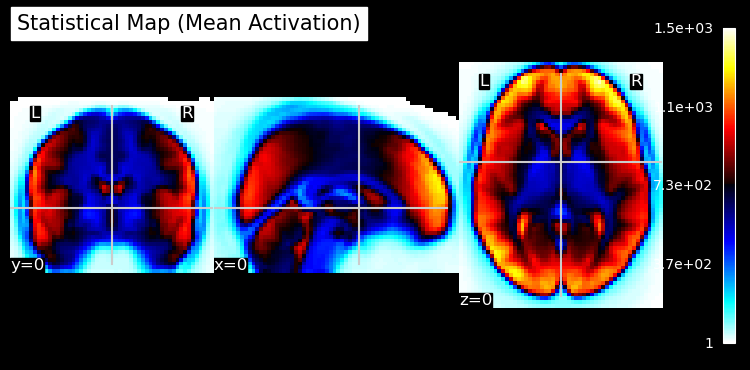

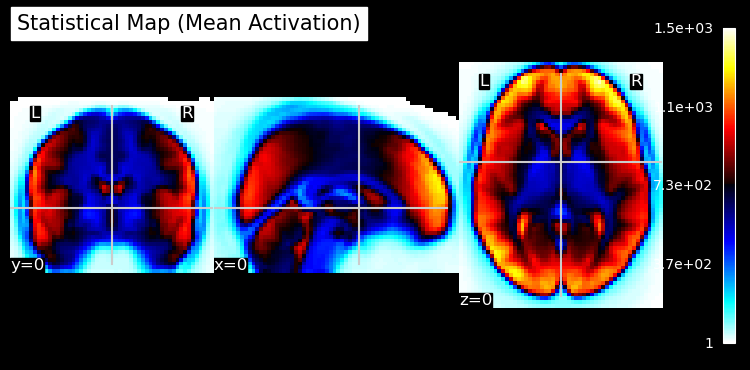

In [13]:
# Filter data for valid diagnosis classes
condition_mask = behavioral['Diagnosis_Class'].notna()
print(f"Condition mask shape: {condition_mask.shape}")
print(condition_mask.sum())  # Check how many rows are being selected

filtered_behavioral_data = behavioral[condition_mask]
print(f"Behavioral data shape after filtering: {filtered_behavioral_data.shape}")

# Extract valid subject IDs that match 'subject_ids'
valid_subject_ids = [
    sub_id for sub_id in subject_ids if sub_id in filtered_behavioral_data['ScanDir ID'].astype(str).tolist()
]
print(f"Valid Subject IDs: {valid_subject_ids}")

# Filter fMRI images using the valid subject IDs
valid_fmri_imgs = []

for subject_id in valid_subject_ids:
    # Build the path to the subject's fMRI file
    fmri_path = os.path.join(data_dir, f'fmri_X_{subject_id}_session_1_run1.nii.gz')

    # Check if the file exists before attempting to load
    if not os.path.exists(fmri_path):
        print(f"File not found for Subject ID: {subject_id}")
        continue

    # Load the subject's fMRI image
    fmri_img = nib.load(fmri_path)
    valid_fmri_imgs.append(fmri_img)

# Function to check and correct shapes
from nilearn.image import resample_img, concat_imgs

def check_and_correct_shapes(image_list):
    if not image_list:
        raise ValueError("The image list is empty.")
    
    # Reference shape and affine from the first image
    reference_img = image_list[0]
    target_shape = reference_img.shape[:3]  # Only spatial dimensions
    target_affine = reference_img.affine

    corrected_images = []
    for idx, img in enumerate(image_list):
        if img.shape[:3] != target_shape:
            print(f"Resampling image {idx} to match target shape {target_shape}")
            img = resample_img(img, target_affine=target_affine, target_shape=target_shape)
        corrected_images.append(img)
    
    return corrected_images

# Check and correct fMRI image shapes
try:
    valid_fmri_imgs = check_and_correct_shapes(valid_fmri_imgs)
    # Concatenate all valid fMRI images into a single 4D image
    fmri_imgs = concat_imgs(valid_fmri_imgs)
    print(f"Concatenated fMRI images shape: {fmri_imgs.shape}")
except Exception as e:
    print(f"Error during processing: {e}")

# Check and correct fMRI image shapes
try:
    valid_fmri_imgs = check_and_correct_shapes(valid_fmri_imgs)
    # Concatenate all valid fMRI images into a single 4D image
    fmri_imgs = concat_imgs(valid_fmri_imgs)
    print(f"Concatenated fMRI images shape: {fmri_imgs.shape}")

    # =========================
    # Statistical Map Visualization
    # =========================

    from nilearn import plotting
    from nilearn.image import mean_img, math_img

    # Calculate the mean functional image (background for visualization)
    mean_func_img = mean_img(fmri_imgs)

    # Compute a mock statistical map (e.g., mean activation across subjects)
    # Replace this with your real statistical analysis
    stat_map = math_img("np.mean(img, axis=-1)", img=fmri_imgs)

    # Plot the statistical map
    plotting.plot_stat_map(
        stat_map,
        bg_img=mean_func_img,
        title="Statistical Map (Mean Activation)",
        threshold=1.0,  # Adjust threshold as needed
        display_mode="ortho",  # Options: "ortho", "z", etc.
        cut_coords=(0, 0, 0),  # Adjust slice coordinates as needed
        colorbar=True
    )

    # Save the plot to a file (optional)
    output_plot_path = "/path/to/output/stat_map.png"
    plotting.plot_stat_map(
        stat_map,
        bg_img=mean_func_img,
        title="Statistical Map (Mean Activation)",
        threshold=1.0,
        display_mode="ortho",
        cut_coords=(0, 0, 0),
        colorbar=True,
        output_file=output_plot_path
    )

    # Show the plot
    plotting.show()

except Exception as e:
    print(f"Error during processing: {e}")



ValueError: Vertices in parcellation do not form region.

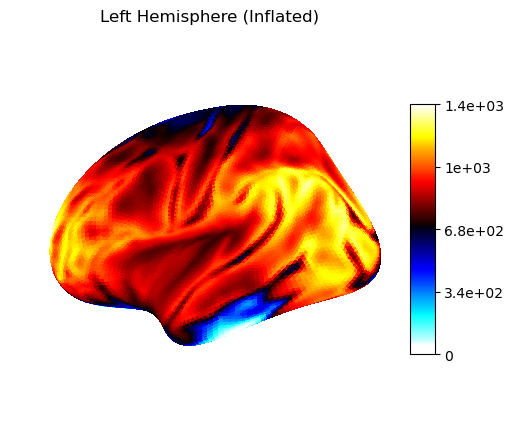

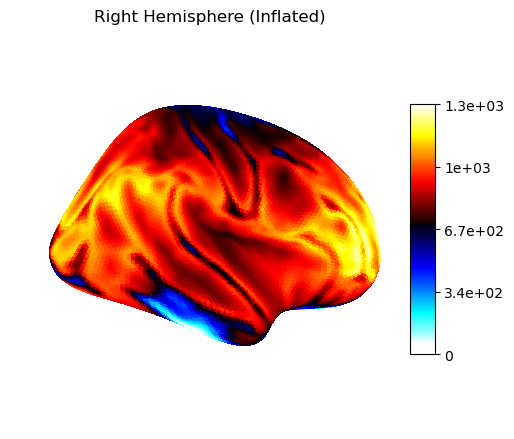

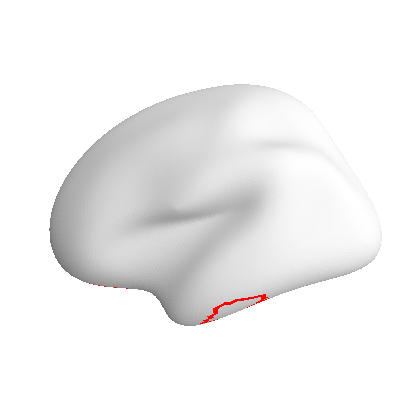

In [24]:
from nilearn.surface import vol_to_surf
from nilearn.datasets import fetch_surf_fsaverage
from nilearn.plotting import plot_surf_stat_map, plot_surf_contours
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Load the FreeSurfer fsaverage mesh
fsaverage = fetch_surf_fsaverage()

# Project the 3D statistical map onto the cortical mesh
texture_left = vol_to_surf(stat_map, fsaverage.pial_left)
texture_right = vol_to_surf(stat_map, fsaverage.pial_right)

# Normalize ROI map values
roi_texture_left = vol_to_surf(mapping_img, fsaverage.pial_left)
roi_texture_right = vol_to_surf(mapping_img, fsaverage.pial_right)

# Normalize ROI texture values for better readability
scaler = MinMaxScaler(feature_range=(0, 1))
roi_texture_left_normalized = scaler.fit_transform(roi_texture_left.reshape(-1, 1)).reshape(-1)
roi_texture_right_normalized = scaler.fit_transform(roi_texture_right.reshape(-1, 1)).reshape(-1)

# Display the surface plot of the projected map (left hemisphere)
plot_surf_stat_map(
    fsaverage.infl_left, texture_left, hemi='left',
    title='Left Hemisphere (Inflated)',
    colorbar=True, threshold=1.0,  # Adjust threshold as needed
    bg_map=fsaverage.sulc_left,
    engine='matplotlib'  # Default engine
)

# Display the surface plot of the projected map (right hemisphere)
plot_surf_stat_map(
    fsaverage.infl_right, texture_right, hemi='right',
    title='Right Hemisphere (Inflated)',
    colorbar=True, threshold=1.0,  # Adjust threshold as needed
    bg_map=fsaverage.sulc_right,
    engine='matplotlib'  # Default engine
)

# Adding contours for regions of interest (ROI) with normalized values
plot_surf_contours(
    surf_mesh=fsaverage.infl_left, roi_map=roi_texture_left_normalized,
    levels=np.linspace(0, 1, 5),  # Generate 5 evenly spaced levels in normalized range
    colors=['r', 'g', 'b', 'y', 'c'],  # Colors for each level
    title="Left Hemisphere ROI Contours (Normalized)"
)

plot_surf_contours(
    surf_mesh=fsaverage.infl_right, roi_map=roi_texture_right_normalized,
    levels=np.linspace(0, 1, 5),  # Generate 5 evenly spaced levels in normalized range
    colors=['r', 'g', 'b', 'y', 'c'],  # Colors for each level
    title="Right Hemisphere ROI Contours (Normalized)"
)


In [ ]:
from nilearn.image import index_img
from sklearn.metrics import accuracy_score
from nilearn.decoding import Decoder
from sklearn.model_selection import StratifiedKFold,KFold
from sklearn.linear_model import LogisticRegression

# Ensure fmri_imgs and valid_subject_ids are already defined
print(f"fMRI data shape: {fmri_imgs.shape}")

# Extract the relevant conditions
conditions = filtered_behavioral_data['Diagnosis_Class'].values
print(f"Conditions shape: {conditions.shape}")


In [ ]:

# Initialize the decoder with desired parameters

# REGRESSION: 
# For regression, valid entries are: ‘r2’, ‘neg_mean_absolute_error’, or ‘neg_mean_squared_error’.

        # DEFAULT DECODER:
        # Use when you have a small-to-medium dataset with potentially non-linear decision boundaries.
        # Great for clean data with clearly separable classes.
#decoder = Decoder(estimator="svc", standardize="zscore_sample", cv=5, scoring="accuracy",n_jobs=16)

        # L2 DECODER:
        # l2 regularization penalizes the sum of the squares of the weights.
        # L2 regularization keeps all features but reduces their influence
#decoder = Decoder(estimator="logistic_l2", standardize="zscore_sample", cv=5, scoring="accuracy",n_jobs=16)

# L1 DECODER: 
# L1 regularization reduces model complexity by eliminating some features, 
# L1 regularization penalizes the sum of the absolute values of the weights
# logistic_l1 = LogisticRegression(penalty="l1", solver="liblinear", max_iter=10000)
decoder = Decoder(estimator="logistic_l1", standardize="zscore_sample", cv=10, scoring="accuracy",n_jobs=16)


In [ ]:
# print("decoder.cv_scores_ keys:", decoder.cv_scores_.keys())
# print("decoder.cv_scores_ content:", decoder.cv_scores_)


In [ ]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
fold_accuracies = []
training_losses = []
validation_losses = []

for fold, (train_idx, test_idx) in enumerate(kf.split(conditions), start=1):
    # Split the data into training and test sets
    fmri_train = index_img(fmri_imgs, train_idx)
    fmri_test = index_img(fmri_imgs, test_idx)
    conditions_train = conditions[train_idx]
    conditions_test = conditions[test_idx]

    # Train the decoder
    decoder.fit(fmri_train, conditions_train)

    # Calculate training loss
    # Average scores across all labels and folds
    mean_train_score = np.mean([
        np.mean(scores) for scores in decoder.cv_scores_.values()
    ])
    train_loss = 1 - mean_train_score
    training_losses.append(train_loss)
    
    # Predict on the test set
    predictions = decoder.predict(fmri_test)
    
    # Calculate validation loss (1 - test accuracy)
    val_loss = 1 - accuracy_score(conditions_test, predictions)
    validation_losses.append(val_loss)

    # Calculate and store fold accuracy
    accuracy = accuracy_score(conditions_test, predictions)
    fold_accuracies.append(accuracy)
    print(f"Fold {fold}: Accuracy = {accuracy:.2f}, Training Loss = {train_loss:.2f}, Validation Loss = {val_loss:.2f}")

# Report overall accuracy
mean_accuracy = np.mean(fold_accuracies)
print(f"Mean Cross-Validation Accuracy: {mean_accuracy:.2f}")


In [ ]:
import matplotlib.pyplot as plt

# Plotting cross-validation accuracies
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(training_losses) + 1), training_losses, label='Training Loss', marker='o')
plt.plot(range(1, len(validation_losses) + 1), validation_losses, label='Validation Loss', marker='o')
plt.xlabel('Fold')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss Across Folds')
plt.legend()
plt.grid() 
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(fold_accuracies) + 1), fold_accuracies, label='Fold Accuracy', marker='o', color='green')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy Across Folds')
plt.legend()
plt.grid()
plt.show()